<a href="https://colab.research.google.com/github/Jiayingzhu2/data_analytics/blob/main/python/project3_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hospital for Years 1999-2008 Dataset Analysis**

Tasks:

*Overview 

*Data Exploration (EDA)

*Data Preparation (Wrangling/Cleaning, etc.)


*Build Models

*Evaluate Models

*Select Models



**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Logistic Regression Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#For SMOT
!pip install imblearn

%matplotlib inline

**Get the Data**

In [2]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/buildwelllabs/machine.learning.project/master/diabetic_data.csv")
# df_raw.columns = df_raw.columns.str.strip().str.lower().str.replace(' ','_').str.replace('/','_').str.replace('%','pct')

data = df_raw
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
#check for data types and null values:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
#checking for missing data and dropping columns and  rows with too much missing data:
data.drop(['encounter_id', 'patient_nbr', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'citoglipton', 'glyburide-metformin','glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone','payer_code', 'medical_specialty', 'number_outpatient'],axis=1, inplace=True)
data

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,51,0,16,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),5,33,3,18,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,Yes,NO
101763,Caucasian,Male,[70-80),1,53,0,9,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,Ch,Yes,NO
101764,Caucasian,Female,[80-90),10,45,2,21,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,Up,Ch,Yes,NO


In [5]:
data.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,76.000000,21.000000,16.000000


In [6]:
# Cleaning data and drop colums and rows that don't need
drop1 = set(data[(data['diag_1'] == '?') & (data['diag_2'] == '?') & (data['diag_3'] == '?')].index)
drop1 = drop1.union(set(data['diag_1'][data['diag_1'] == '?'].index))
drop1 = drop1.union(set(data['diag_2'][data['diag_2'] == '?'].index))
drop1 = drop1.union(set(data['diag_3'][data['diag_3'] == '?'].index))
drop1 = drop1.union(set(data['race'][data['race'] == '?'].index))
drop1 = drop1.union(set(data['gender'][data['gender'] == 'Unknown/Invalid'].index))
new1 = list(set(data.index) - set(drop1))
data = data.iloc[new1]
 
data

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,insulin,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),3,59,0,18,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,Ch,Yes,NO
5,Caucasian,Male,[50-60),3,31,6,16,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,51,0,16,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),5,33,3,18,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,Yes,NO
101763,Caucasian,Male,[70-80),1,53,0,9,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,Ch,Yes,NO
101764,Caucasian,Female,[80-90),10,45,2,21,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,Up,Ch,Yes,NO


**Exploratory Data Analysis**

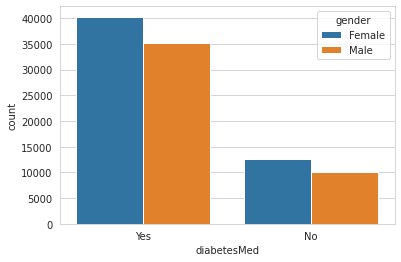

In [7]:
#show the relationship of gender & diabetesMed
sns.set_style('whitegrid')
sns.countplot(x='diabetesMed', hue='gender', data=data)

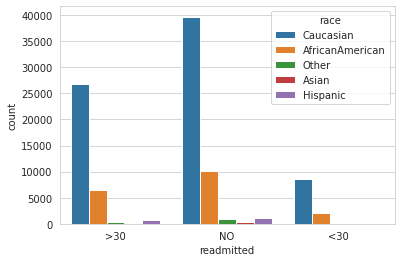

In [8]:
#Show the relationship with race & readmitted
sns.set_style("whitegrid") 
sns.countplot(x='readmitted', hue='race', data=data)

In [ ]:
#Assigning numeric values to relevent columns
data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)
data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)

data['race'] = data['race'].replace('Caucasian', 4)
data['race'] = data['race'].replace('AfricanAmerican', 3)
data['race'] = data['race'].replace('Other', 2)
data['race'] = data['race'].replace('Asian', 1)
data['race'] = data['race'].replace('Hispanic', 0)

data['insulin'] = data['insulin'].replace('No', 0)
data['insulin'] = data['insulin'].replace('Steady', 1)
data['insulin'] = data['insulin'].replace('Down', 2)
data['insulin'] = data['insulin'].replace('Up', 3)
data['readmitted'] = data['readmitted'].replace('NO', 0)
data['readmitted'] = data['readmitted'].replace('>30', 0)
data['readmitted'] = data['readmitted'].replace('<30', 1)

#Assigning median age value to age catagories:
data['age'] = data['age'].replace('[0-10)', 5)
data['age'] = data['age'].replace('[10-20)', 15)
data['age'] = data['age'].replace('[20-30)', 25)
data['age'] = data['age'].replace('[30-40)', 35)
data['age'] = data['age'].replace('[40-50)', 45)
data['age'] = data['age'].replace('[50-60)', 55)
data['age'] = data['age'].replace('[60-70)', 65)
data['age'] = data['age'].replace('[70-80)', 75)
data['age'] = data['age'].replace('[80-90)', 85)
data['age'] = data['age'].replace('[90-100)', 95)

In [10]:
#show the new data and check if it cleaned
data

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,insulin,change,diabetesMed,readmitted
1,4,0,15,3,59,0,18,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,3,1,1,0
2,3,0,25,2,11,5,13,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,0,0,1,0
3,4,1,35,2,44,1,16,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,3,1,1,0
4,4,1,45,1,51,0,8,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,1,1,1,0
5,4,1,55,3,31,6,16,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,1,75,3,51,0,16,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,2,1,1,0
101762,3,0,85,5,33,3,18,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,0,1,0
101763,4,1,75,1,53,0,9,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,2,1,1,0
101764,4,0,85,10,45,2,21,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,3,1,1,0


**Logistic Regression Model**

In [11]:
#predicting the probability of a patient being readmitted in 30 days:
y = data['readmitted']
X = data[['time_in_hospital', 'age','race', 'gender', 'insulin', 'diabetesMed', 'num_medications', 'num_lab_procedures', 'change']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Predictions and Evaluations**

In [12]:
y_pred = logmodel.predict(X_test)

print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))
#show the Confusion Matrix

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     21700
           1       0.00      0.00      0.00      2813

    accuracy                           0.89     24513
   macro avg       0.44      0.50      0.47     24513
weighted avg       0.78      0.89      0.83     24513



[[21700     0]
 [ 2813     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#The model above is imbalanced.
#Use SMOTE to account for data imbalances & Decision Tree model to achieve better prediction capabilities:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

In [14]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

dtree_pred = dtree.predict(X_test)

print(classification_report(y_test, dtree_pred))
print('\n')
print(confusion_matrix(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     12975
           1       0.92      0.80      0.86     13140

    accuracy                           0.86     26115
   macro avg       0.87      0.86      0.86     26115
weighted avg       0.87      0.86      0.86     26115



[[12062   913]
 [ 2624 10516]]


In [15]:
#visualize in matrix 
predict = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

[[12062   913]
 [ 2624 10516]]


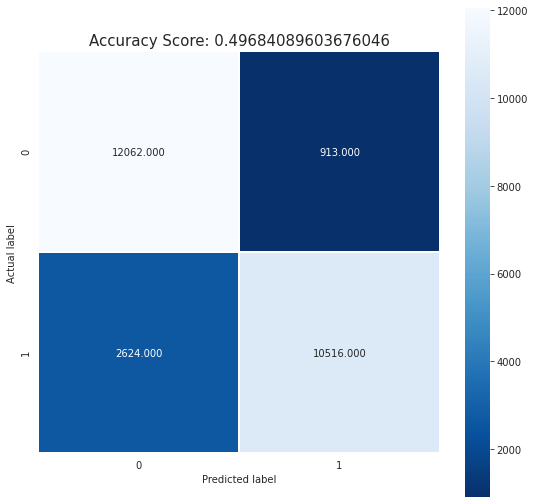

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

# Conclusion
*   The decision tree model is considerably more accurate than the logistic regression model in predicting the readmission of a patient in under 30 days.

*   The logistic regression model is accurate 89% when predicting 'no' and 0% when predicting 'yes'. The decision tree model is accurate ~%86 on both types of prediction. 
